In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Raw data

In [2]:
barra_file = '/g/data/xv83/dbi599/rba/FFDI/BARRA-R2/FFDIx_yr_BARRA-R2_aus-states_1980-2024.csv'
df_barra = pd.read_csv(barra_file)

In [3]:
def plot_location(model, experiment, location, start_year=1950):
    """Scatterplot for a given location"""

    infile = f'/g/data/xv83/dbi599/rba/FFDI/{model}/{experiment}/FFDIx_yr_{model}_{experiment}_ensemble_aus-states_1950-2100.csv'
    df = pd.read_csv(infile)
    fig, ax = plt.subplots(figsize=[15,7])
    sns.scatterplot(
        ax=ax,
        data=df[df['year'] >= start_year],
        x='year',
        y=location,
        hue='run',
    )
    sns.scatterplot(
        ax=ax,
        data=df_barra,
        x='year',
        y=location,
        color='black',
        label='BARRA-R2',
    )
    ax.set_ylabel('FFDIx')
    ax.set_title(f'{model} - {experiment} - {location}')
    ax.grid()
    plt.show()

In [4]:
def plot_dist(model, experiment, location, start_year=1950, end_year=2014):
    """Histogram for a given location"""

    infile = f'/g/data/xv83/dbi599/rba/FFDI/{model}/{experiment}/FFDIx_yr_{model}_{experiment}_ensemble_aus-states_1950-2100.csv'
    df = pd.read_csv(infile)
    df_ref = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    fig, ax = plt.subplots()
    sns.histplot(
        ax=ax,
        data=df_ref,
        x=location,
    )
    ax.set_ylabel('FFDIx')
    ax.set_title(f'{model} - {experiment} - {location}')
    ax.grid()
    plt.show()

#### ACCESS-CM2

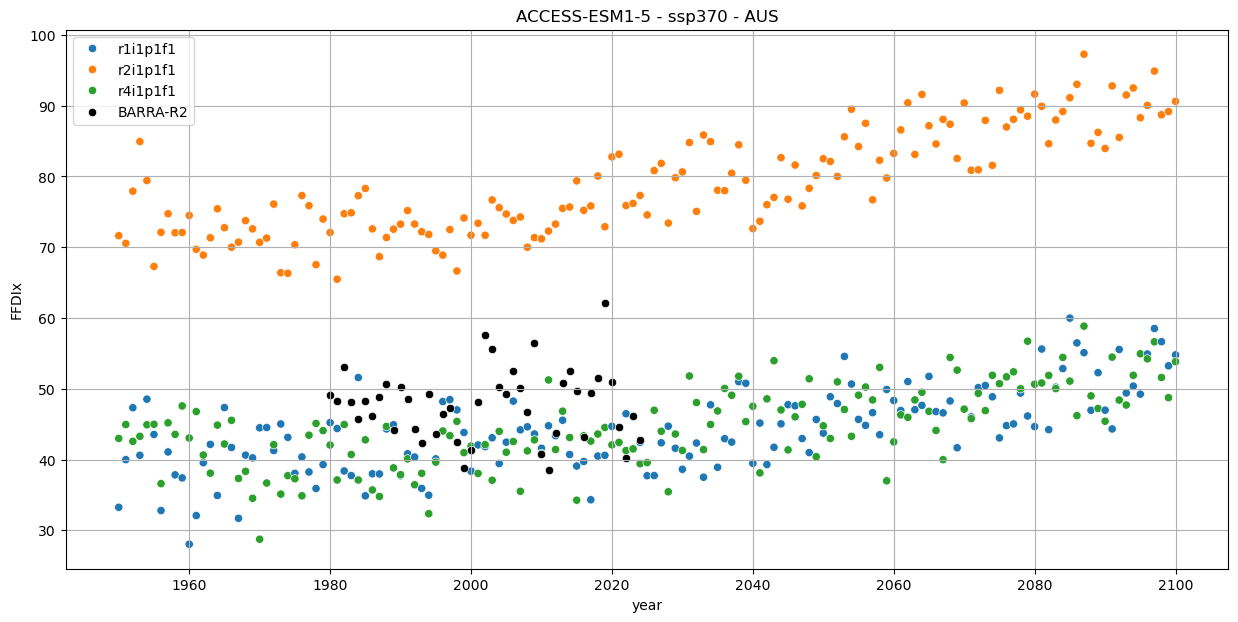

In [7]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'AUS')

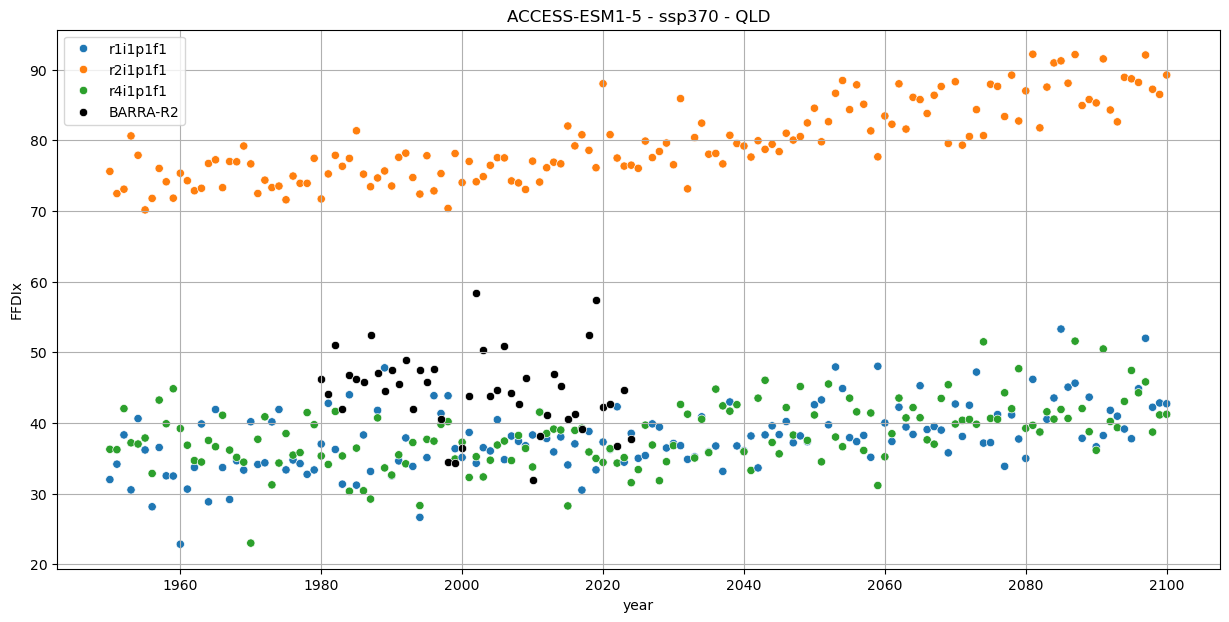

In [10]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'QLD')

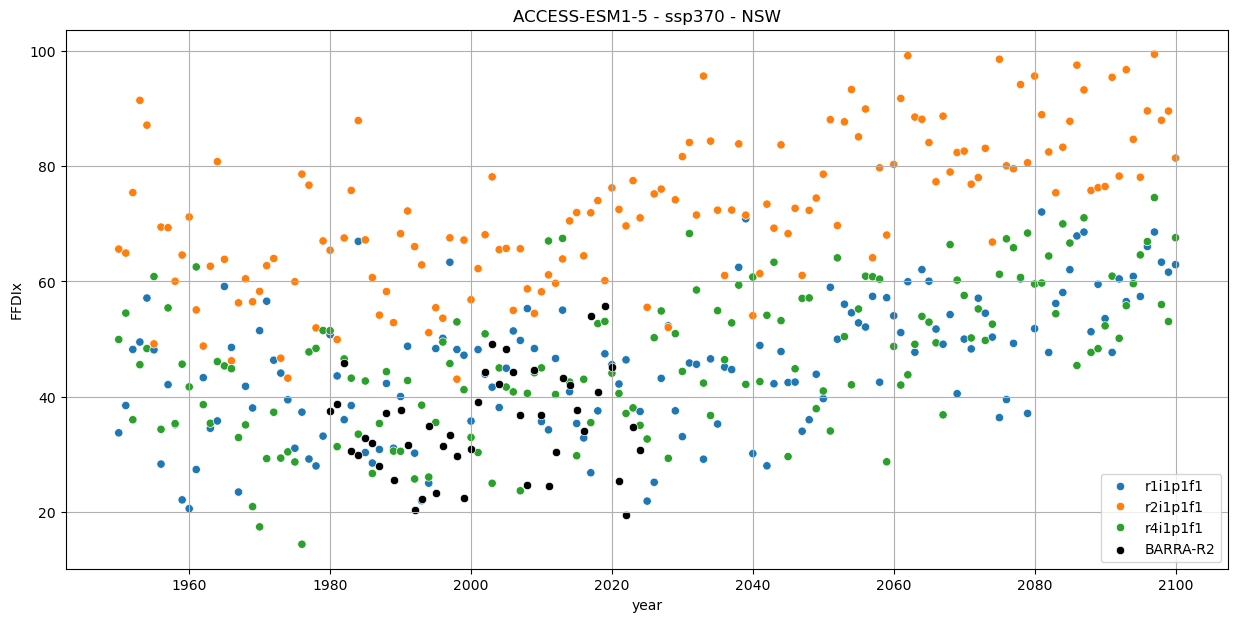

In [11]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'NSW')

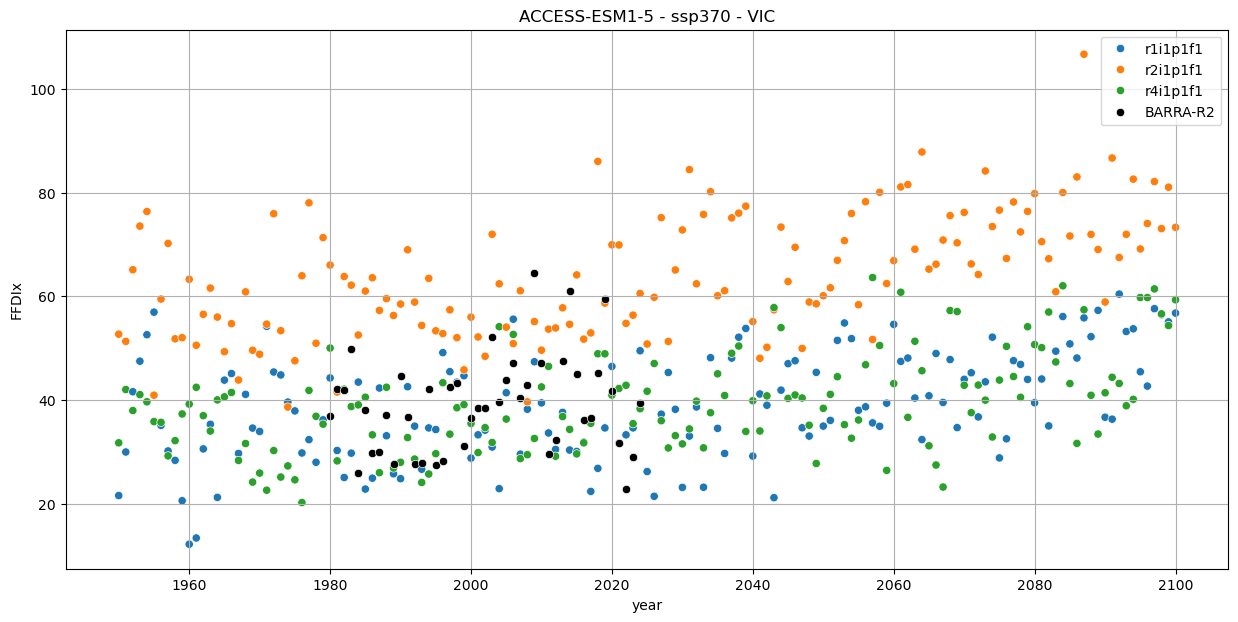

In [8]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'VIC')

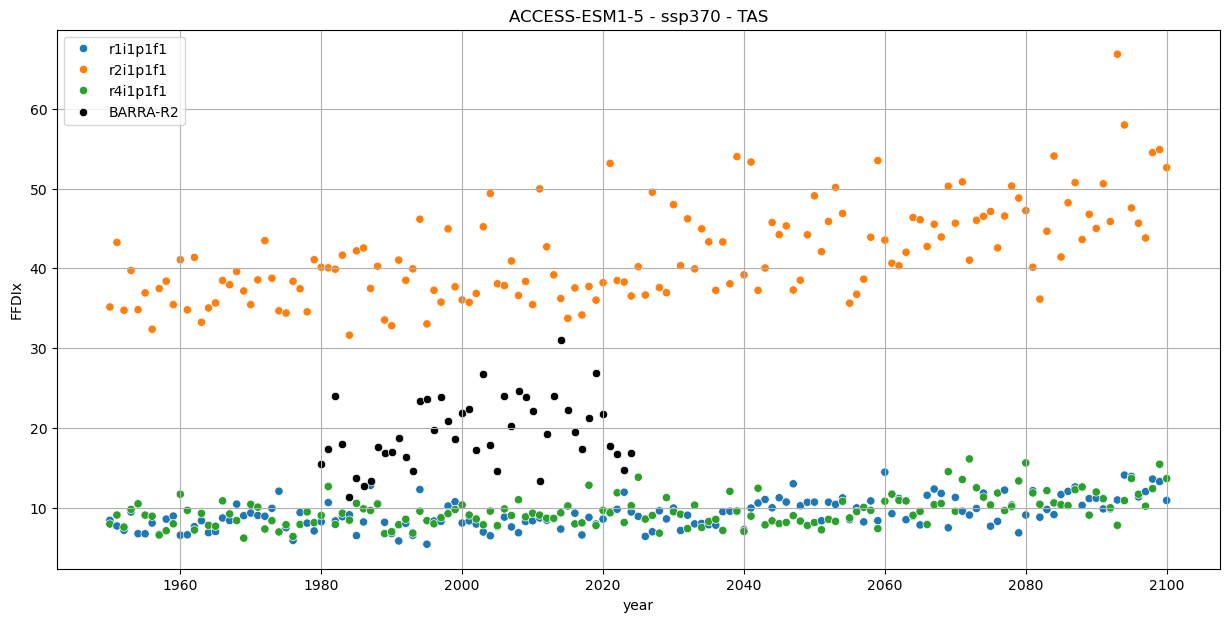

In [9]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'TAS')

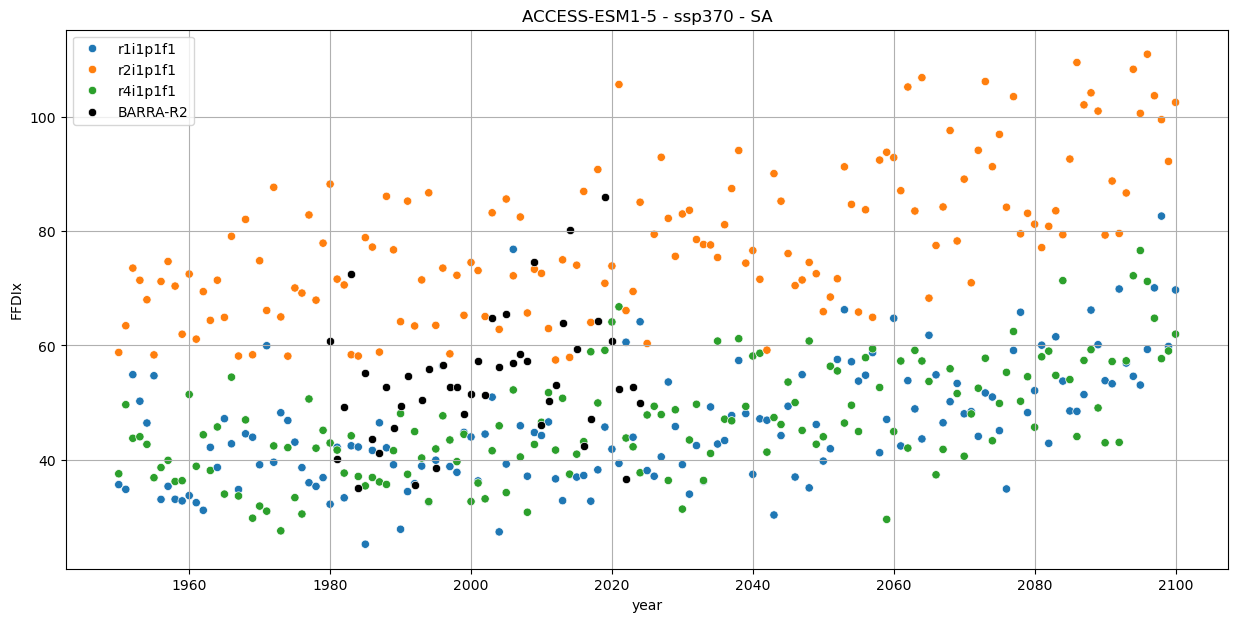

In [12]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'SA')

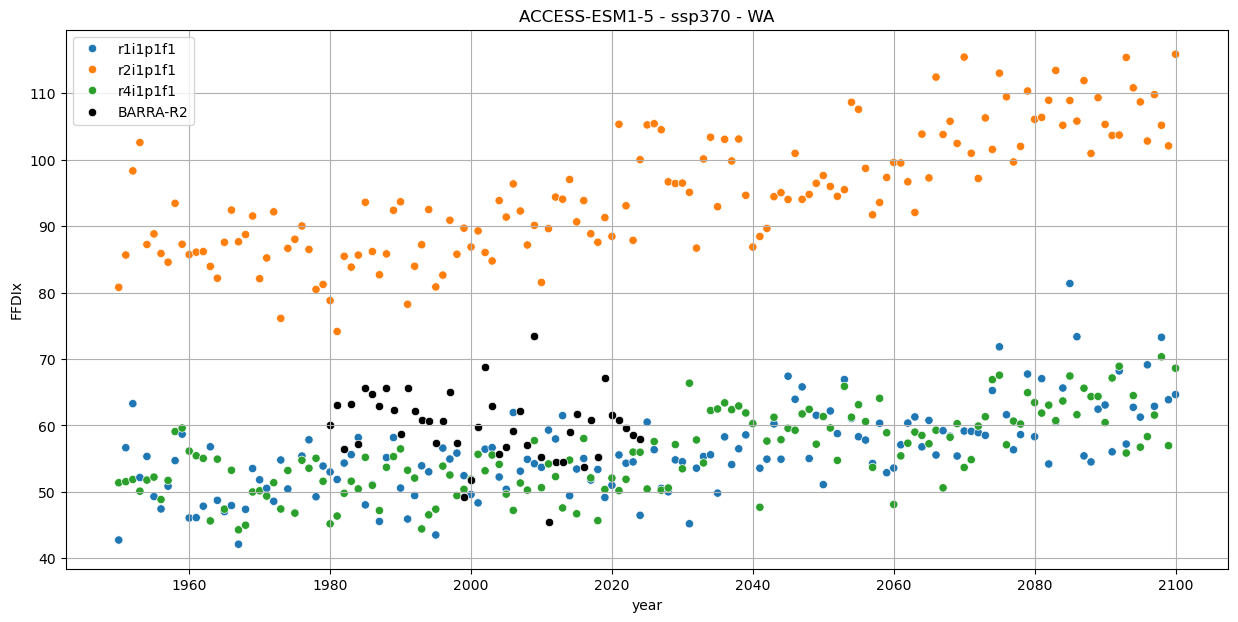

In [13]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'WA')

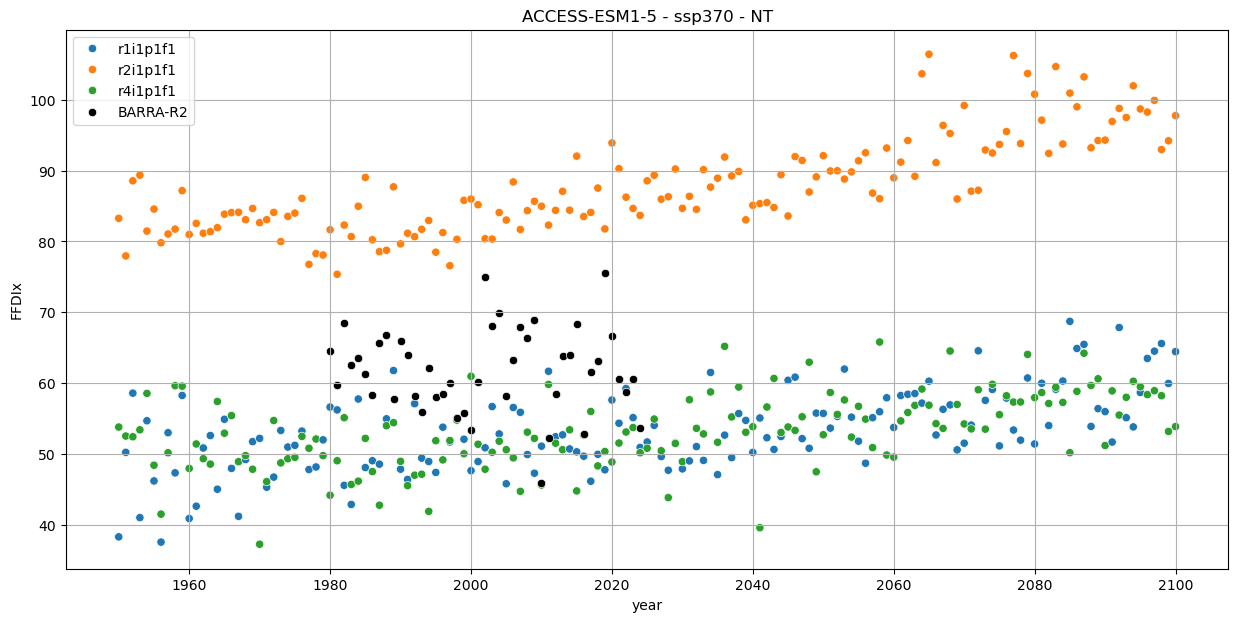

In [14]:
plot_location('ACCESS-ESM1-5', 'ssp370', 'NT')

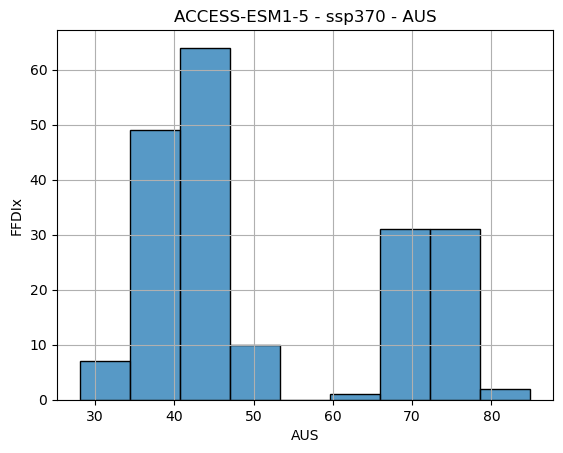

In [15]:
plot_dist('ACCESS-ESM1-5', 'ssp370', 'AUS')

## Ensemble

In [17]:
colors = {
    'ssp126': 'tab:blue',
    'ssp245': 'tab:green',
    'ssp370': 'tab:orange',
    'ssp585': 'tab:red',
}

linestyles = {
    'ACCESS-ESM1-5': '-',
}

return_conversion = {
    '1-in-50 year': '98-0p',
    '1-in-40 year': '97-5p',
    '1-in-30 year': '96-7p',
    '1-in-20 year': '95-0p',
    '1-in-10 year': '90-0p',
}

def plot_ensemble_odds(
    models,
    experiments,
    location,
    return_period,
):
    """Ensemble odds of a year higher than a given return period for a given location."""

    # Plot
    fig, ax = plt.subplots()
    plabel = return_conversion[return_period]
    for model in models:
        for experiment in experiments:
            infile = f'/g/data/xv83/dbi599/rba/FFDI/{model}/{experiment}/ffdix_yr_{plabel}-likelihood_{model}_{experiment}_aus-states_1960-2091.csv'
            df = pd.read_csv(infile, header=7, index_col='year')
            df = df[location]
            sns.lineplot(
                ax=ax,
                data=df,
                label=f'{model} ({experiment})',
                color=colors[experiment],
                linestyle=linestyles[model],
            )
    ax.set_xlabel('year')
    ax.set_ylabel(f'odds of exceeding {return_period} event (%)') 
    ax.set_title(f'FFDIx - {location}')
    ax.grid()
    plt.show()

    # Supporting info
    for model in models:
        pfile = f'/g/data/xv83/dbi599/rba/FFDI/{model}/{experiments[0]}/ffdix_yr_percentiles_{model}_{experiments[0]}_aus-states_1950-2014.csv'
        pdf = pd.read_csv(pfile, header=6, index_col='percentile')
        pdf = pdf[location]
        p = float(plabel[0:-1].replace('-', '.'))
        pval = pdf.loc[p]
        print(f'{return_period} event, {model}: {pval}')
        
    obs = pd.read_csv(
        '/g/data/xv83/dbi599/rba/FFDI/BARRA-R2/FFDIx_yr_BARRA-R2_aus-states_1980-2024.csv',
        index_col='year',
    )
    print('Top 10 years in BARRA-R2:')
    print(obs[location].sort_values(ascending=False)[0:15])

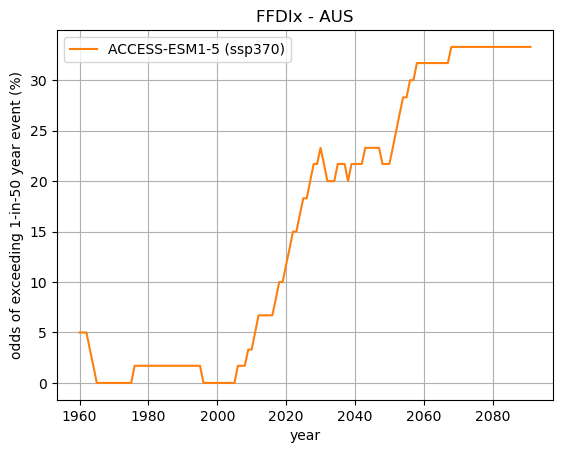

1-in-50 year event, ACCESS-ESM1-5: 77.37
Top 10 years in BARRA-R2:
year
2019    62.16
2002    57.64
2009    56.52
2003    55.60
1982    53.07
2014    52.49
2006    52.44
2018    51.47
2020    50.89
2013    50.75
1988    50.66
1990    50.25
2004    50.24
2007    50.07
2015    49.73
Name: AUS, dtype: float64


In [18]:
plot_ensemble_odds(
    ['ACCESS-ESM1-5', ],
    ['ssp370',],
    'AUS',
    '1-in-50 year',
)

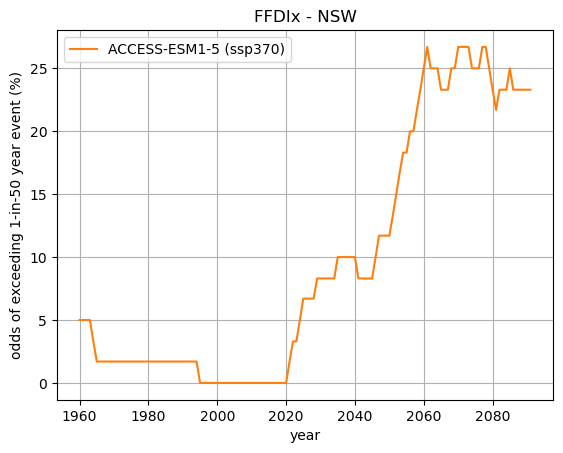

1-in-50 year event, ACCESS-ESM1-5: 78.88
Top 10 years in BARRA-R2:
year
2019    55.74
2017    54.09
2003    49.24
2005    48.32
1982    45.80
2020    45.23
2009    44.58
2006    44.35
2002    44.23
2013    43.22
2004    42.30
2014    42.10
2018    40.90
2001    39.12
1981    38.76
Name: NSW, dtype: float64


In [19]:
plot_ensemble_odds(
    ['ACCESS-ESM1-5',],
    ['ssp370',],
    'NSW',
    '1-in-50 year',
)

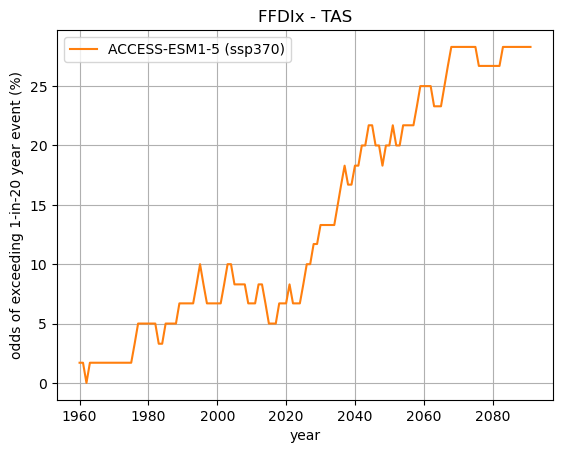

1-in-20 year event, ACCESS-ESM1-5: 41.81
Top 10 years in BARRA-R2:
year
2014    31.05
2019    26.91
2003    26.75
2008    24.64
2013    24.02
1982    23.99
2006    23.95
1997    23.89
2009    23.86
1995    23.66
1994    23.38
2001    22.42
2015    22.27
2010    22.14
2000    21.87
Name: TAS, dtype: float64


In [20]:
plot_ensemble_odds(
    ['ACCESS-ESM1-5',],
    ['ssp370'],
    'TAS',
    '1-in-20 year',
)